In [0]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
from tensorflow.keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 20000)

X_train,y_train


17465344/17464789 [==============================] - 0s 0us/step


(array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
        list([1, 194, 1153, 194, 

In [0]:
train_padded = pad_sequences(X_train, padding='post', maxlen=120)
validation_padded = pad_sequences(X_test,  padding='post', maxlen=120)

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 128, input_length=120),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 128)          2560000   
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 64)           41216     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 2,627,633
Trainable params: 2,627,633
Non-trainable params: 0
______________________________________________

In [6]:
history = model.fit(train_padded,y_train, epochs=10,batch_size=128,validation_data=(validation_padded,y_test))

Epoch 1/10
196/196 [==============================] - 95s 486ms/step - loss: 0.4274 - accuracy: 0.7885 - val_loss: 0.3246 - val_accuracy: 0.8588
Epoch 2/10
196/196 [==============================] - 94s 481ms/step - loss: 0.2139 - accuracy: 0.9206 - val_loss: 0.3452 - val_accuracy: 0.8497
Epoch 3/10
196/196 [==============================] - 94s 481ms/step - loss: 0.1176 - accuracy: 0.9602 - val_loss: 0.4747 - val_accuracy: 0.8462
Epoch 4/10
196/196 [==============================] - 94s 479ms/step - loss: 0.0598 - accuracy: 0.9798 - val_loss: 0.5872 - val_accuracy: 0.8327
Epoch 5/10
196/196 [==============================] - 93s 475ms/step - loss: 0.0433 - accuracy: 0.9863 - val_loss: 0.6412 - val_accuracy: 0.8333
Epoch 6/10
196/196 [==============================] - 92s 470ms/step - loss: 0.0258 - accuracy: 0.9915 - val_loss: 0.7796 - val_accuracy: 0.8373
Epoch 7/10
196/196 [==============================] - 92s 469ms/step - loss: 0.0185 - accuracy: 0.9946 - val_loss: 0.9524 - val_ac

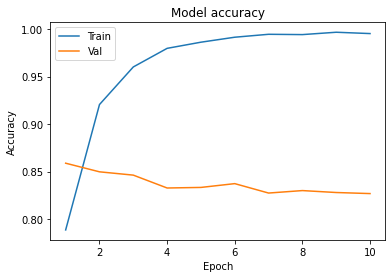

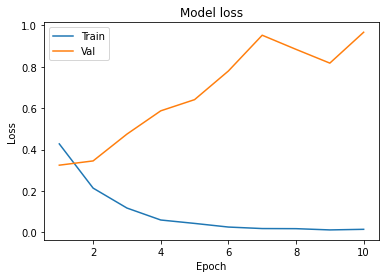

In [8]:
import matplotlib.pyplot as plt
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
plot_learningCurve(history, 10)  